In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt     
from mle_toolbox import load_result_logs
from mle_toolbox.visualize import visualize_2D_grid

colors = [     
          [0.97, 0.51, 0.47], # OpenAI
          [0.59, 0.99, 0.99], # SNES
          [0.99, 0.59, 0.99], # PGPE
          [0.99, 0.99, 0.59], # CMA
          ]

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Learning Curves for 4 Brax Environments
### Open ES, PGPE, SNES, SepCMA

In [2]:
meta_log_snes, hyper_log_snes = load_result_logs("../experiments/tuned/SNES")
meta_log_pgpe, hyper_log_pgpe = load_result_logs("../experiments/tuned/PGPE")
meta_log_sep, hyper_log_sep = load_result_logs("../experiments/tuned/Sep_CMA_ES")
meta_log_open, hyper_log_open = load_result_logs("../experiments/tuned/OpenES")

def get_perf_env(meta_log, hyper_log, popsize, env_name):
    """Filter dataframe for environment and popsize."""
    run_id = hyper_log.filter({"env_name": env_name, "popsize": popsize}).run_id.iloc[0]
    mean_perf = meta_log[run_id].stats.test_perf.mean
    std_perf = meta_log[run_id].stats.test_perf.std
    gens = meta_log[run_id].time.num_gens
    return mean_perf, std_perf, gens

def get_final_perf(meta_log, hyper_log, popsizes, env_name):
    """Filter dataframe for environment and popsizes."""
    all_final = []
    for p in popsizes:
        run_id = hyper_log.filter({"env_name": env_name, "popsize": p}).run_id.iloc[0]
        mean_perf = meta_log[run_id].stats.test_perf.mean
        all_final.append(mean_perf[20])
    return all_final

mean, std, gen = get_perf_env(meta_log_snes, hyper_log_snes, 256, "halfcheetah")
gen[20]
all_final = get_final_perf(meta_log_snes, hyper_log_snes, [64, 128, 256, 512, 1024], "halfcheetah")
all_final

/Users/rob/anaconda3/envs/mle-toolbox/lib/python3.9/site-packages/numpy/lib/function_base.py:4650: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(


[5215.639404296875,
 5972.844075520833,
 6886.813151041667,
 5726.046712239583,
 6451.686848958333]

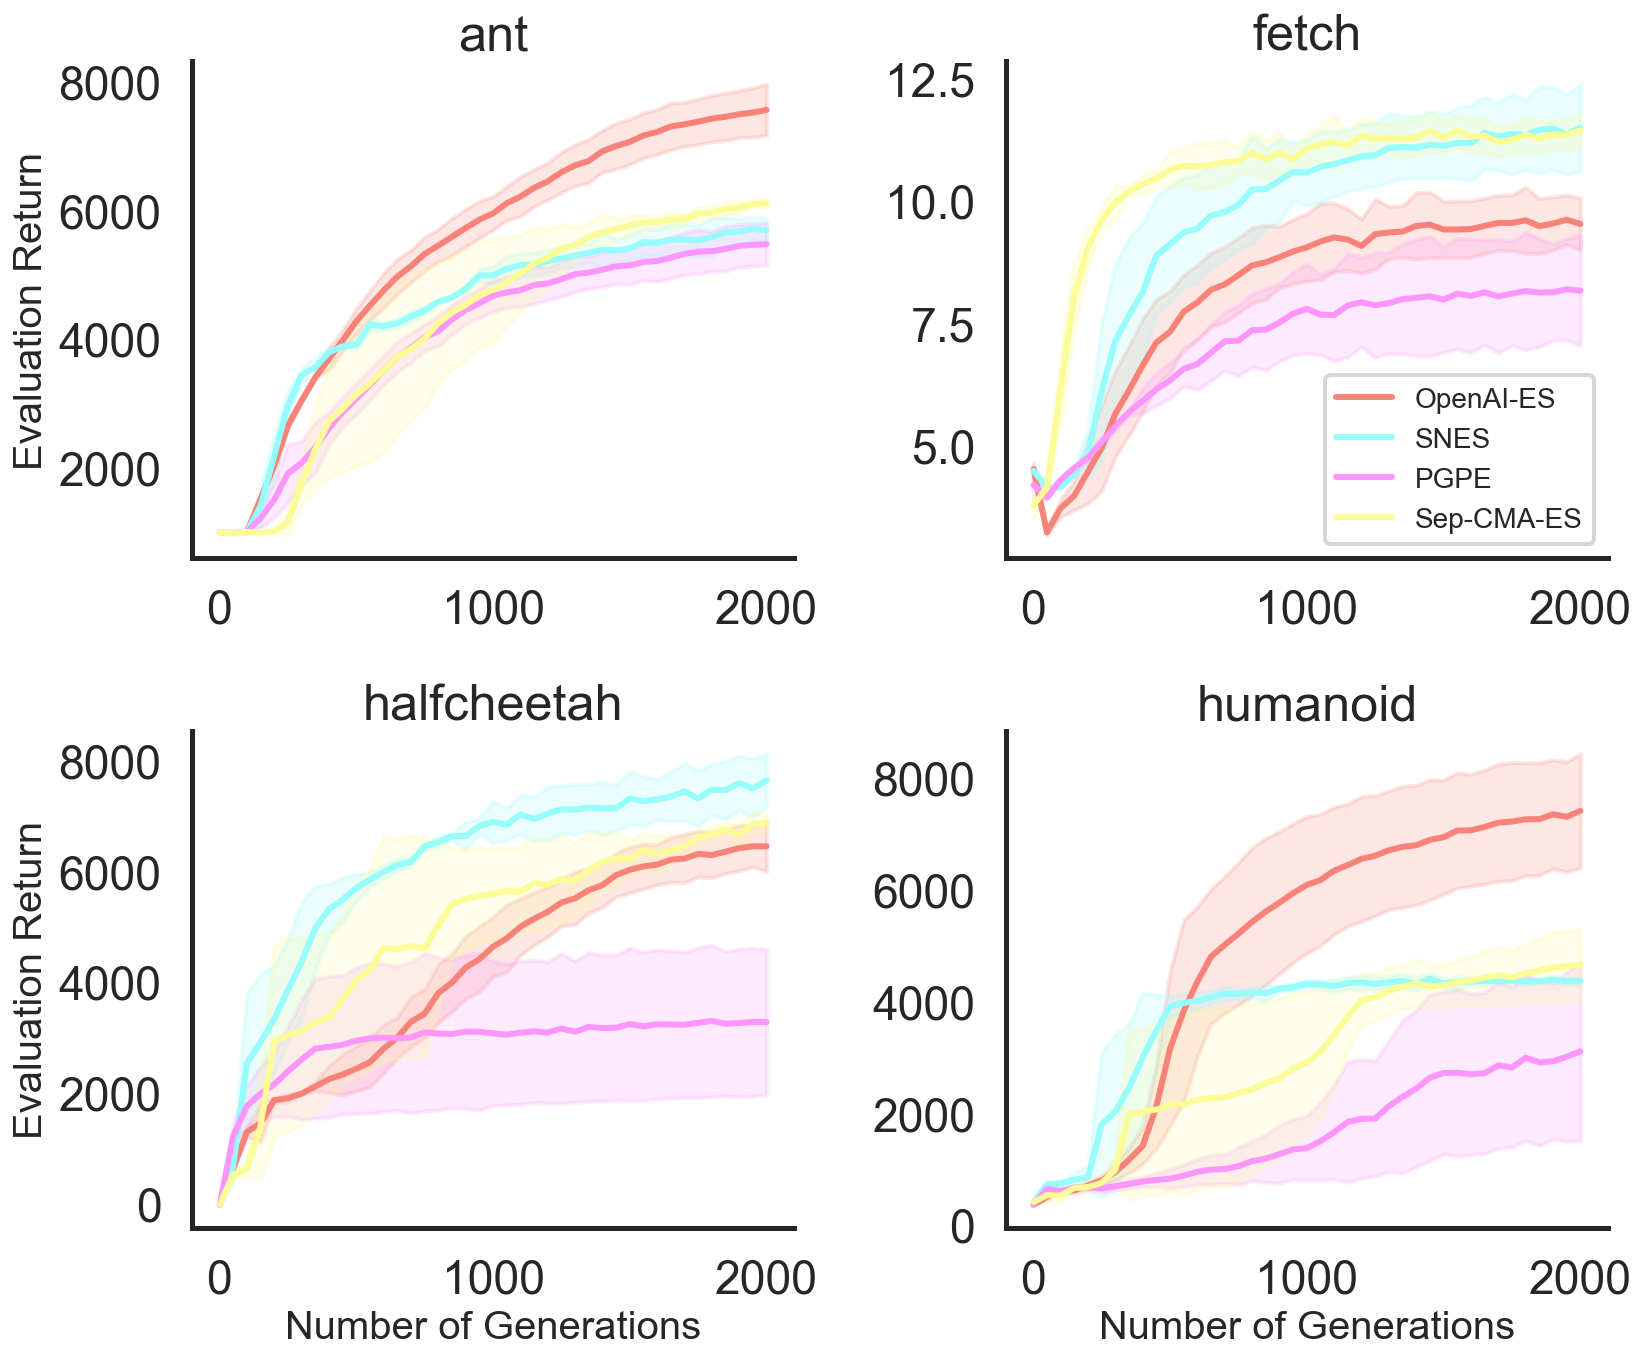

In [3]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

for i, env in enumerate([ "ant", "fetch", "halfcheetah", "humanoid"]):
    mean, std, gens = get_perf_env(meta_log_open, hyper_log_open, 256, env)
    axs.flatten()[i].plot(gens, mean, label="OpenAI-ES", color=colors[0])
    axs.flatten()[i].fill_between(gens, mean - std, mean + std, color=colors[0], alpha=0.2)

    mean, std, gens = get_perf_env(meta_log_snes, hyper_log_snes, 256, env)
    axs.flatten()[i].plot(gens, mean, label="SNES", color=colors[1])
    axs.flatten()[i].fill_between(gens, mean - std, mean + std, color=colors[1], alpha=0.2)

    mean, std, gens = get_perf_env(meta_log_pgpe, hyper_log_pgpe, 256, env)
    axs.flatten()[i].plot(gens, mean, label="PGPE", color=colors[2])
    axs.flatten()[i].fill_between(gens, mean - std, mean + std, color=colors[2], alpha=0.2)

    mean, std, gens = get_perf_env(meta_log_sep, hyper_log_sep, 256, env)
    axs.flatten()[i].plot(gens, mean, label="Sep-CMA-ES", color=colors[3])
    axs.flatten()[i].fill_between(gens, mean - std, mean + std, color=colors[3], alpha=0.2)

    axs.flatten()[i].spines["top"].set_visible(False)
    axs.flatten()[i].spines["right"].set_visible(False)
    axs.flatten()[i].spines["top"].set_visible(False)
    axs.flatten()[i].spines["right"].set_visible(False)
    axs.flatten()[i].set_title(env)

axs.flatten()[1].legend(fontsize=14)
axs.flatten()[2].set_xlabel("Number of Generations", fontsize=20)
axs.flatten()[3].set_xlabel("Number of Generations", fontsize=20)
axs.flatten()[0].set_ylabel("Evaluation Return", fontsize=20)
axs.flatten()[2].set_ylabel("Evaluation Return", fontsize=20)

fig.tight_layout()

## Population Sizes for 4 Brax Environments
## Open ES, PGPE, SNES, SepCMA

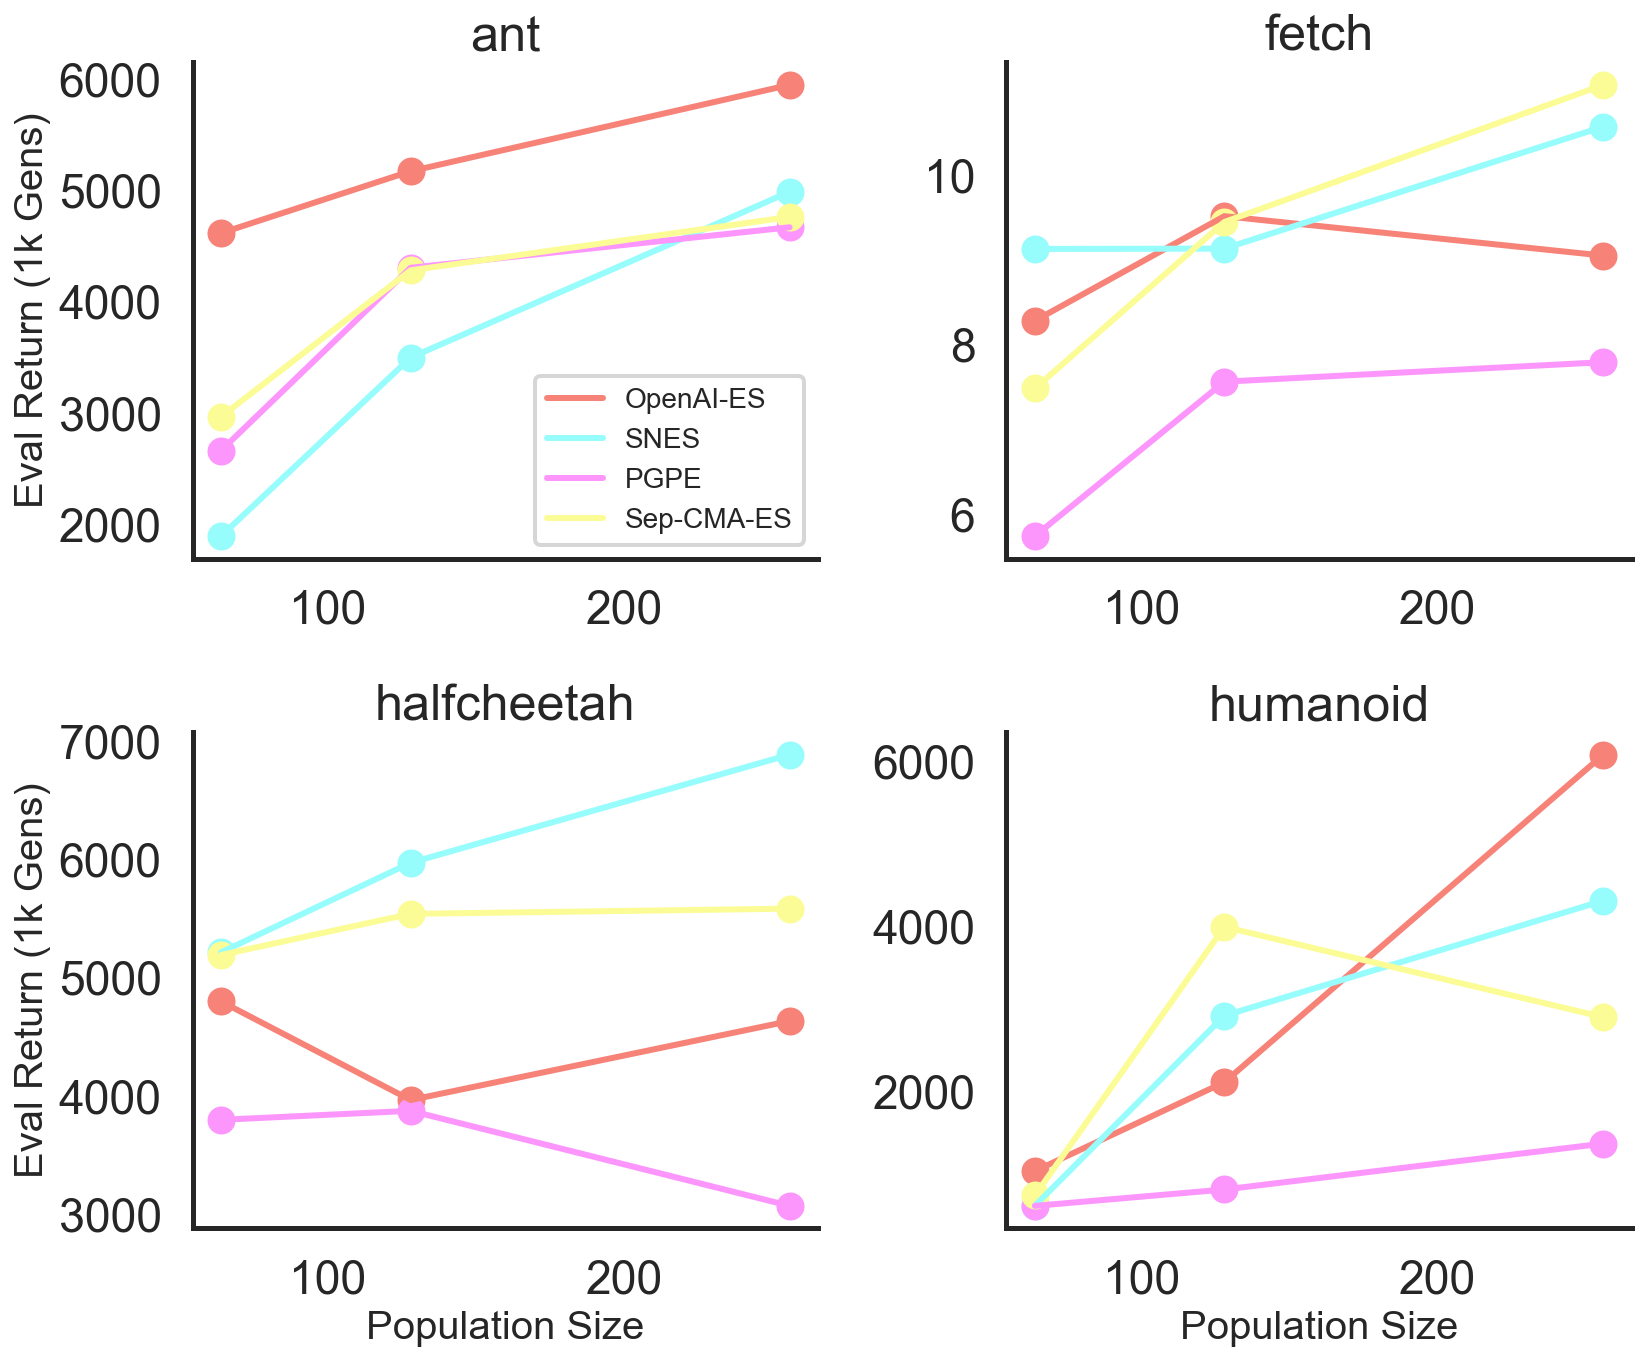

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

popsizes = [64, 128, 256]
for i, env in enumerate([ "ant", "fetch", "halfcheetah", "humanoid"]):
    all_final = get_final_perf(meta_log_open, hyper_log_open, popsizes, env)
    axs.flatten()[i].plot(popsizes, all_final, label="OpenAI-ES", color=colors[0])
    axs.flatten()[i].scatter(popsizes, all_final, color=colors[0])
    
    all_final = get_final_perf(meta_log_snes, hyper_log_snes, popsizes, env)
    axs.flatten()[i].plot(popsizes, all_final, label="SNES", color=colors[1])
    axs.flatten()[i].scatter(popsizes, all_final, color=colors[1])

    all_final = get_final_perf(meta_log_pgpe, hyper_log_pgpe, popsizes, env)
    axs.flatten()[i].plot(popsizes, all_final, label="PGPE", color=colors[2])
    axs.flatten()[i].scatter(popsizes, all_final, color=colors[2])

    all_final = get_final_perf(meta_log_sep, hyper_log_sep, popsizes, env)
    axs.flatten()[i].plot(popsizes, all_final, label="Sep-CMA-ES", color=colors[3])
    axs.flatten()[i].scatter(popsizes, all_final, color=colors[3])

    axs.flatten()[i].spines["top"].set_visible(False)
    axs.flatten()[i].spines["right"].set_visible(False)
    axs.flatten()[i].spines["top"].set_visible(False)
    axs.flatten()[i].spines["right"].set_visible(False)
    axs.flatten()[i].set_title(env)

axs.flatten()[0].legend(fontsize=14)
axs.flatten()[2].set_xlabel("Population Size", fontsize=20)
axs.flatten()[3].set_xlabel("Population Size", fontsize=20)
axs.flatten()[0].set_ylabel("Eval Return (1k Gens)", fontsize=20)
axs.flatten()[2].set_ylabel("Eval Return (1k Gens)", fontsize=20)

fig.tight_layout()

# Supplementary

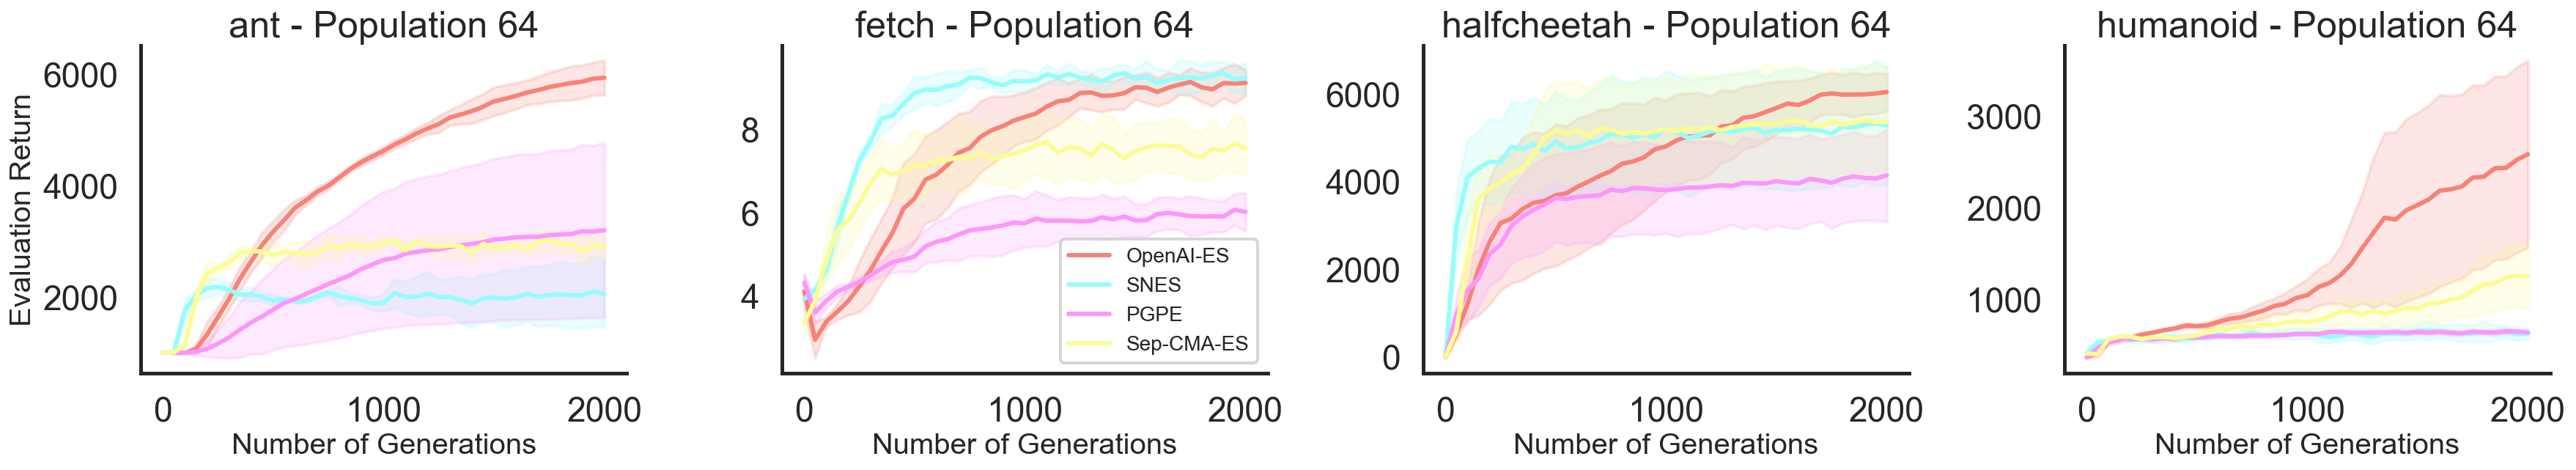

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(25, 5))

for i, env in enumerate([ "ant", "fetch", "halfcheetah", "humanoid"]):
    mean, std, gens = get_perf_env(meta_log_open, hyper_log_open, 64, env)
    axs.flatten()[i].plot(gens, mean, label="OpenAI-ES", color=colors[0])
    axs.flatten()[i].fill_between(gens, mean - std, mean + std, color=colors[0], alpha=0.2)
    
    mean, std, gens = get_perf_env(meta_log_snes, hyper_log_snes, 64, env)
    axs.flatten()[i].plot(gens, mean, label="SNES", color=colors[1])
    axs.flatten()[i].fill_between(gens, mean - std, mean + std, color=colors[1], alpha=0.2)

    mean, std, gens = get_perf_env(meta_log_pgpe, hyper_log_pgpe, 64, env)
    axs.flatten()[i].plot(gens, mean, label="PGPE", color=colors[2])
    axs.flatten()[i].fill_between(gens, mean - std, mean + std, color=colors[2], alpha=0.2)

    mean, std, gens = get_perf_env(meta_log_sep, hyper_log_sep, 64, env)
    axs.flatten()[i].plot(gens, mean, label="Sep-CMA-ES", color=colors[3])
    axs.flatten()[i].fill_between(gens, mean - std, mean + std, color=colors[3], alpha=0.2)

    axs.flatten()[i].spines["top"].set_visible(False)
    axs.flatten()[i].spines["right"].set_visible(False)
    axs.flatten()[i].spines["top"].set_visible(False)
    axs.flatten()[i].spines["right"].set_visible(False)
    axs.flatten()[i].set_title(env + f" - Population {64}")

axs.flatten()[1].legend(fontsize=14)
axs.flatten()[0].set_xlabel("Number of Generations", fontsize=20)
axs.flatten()[1].set_xlabel("Number of Generations", fontsize=20)
axs.flatten()[2].set_xlabel("Number of Generations", fontsize=20)
axs.flatten()[3].set_xlabel("Number of Generations", fontsize=20)
axs.flatten()[0].set_ylabel("Evaluation Return", fontsize=20)

fig.tight_layout()

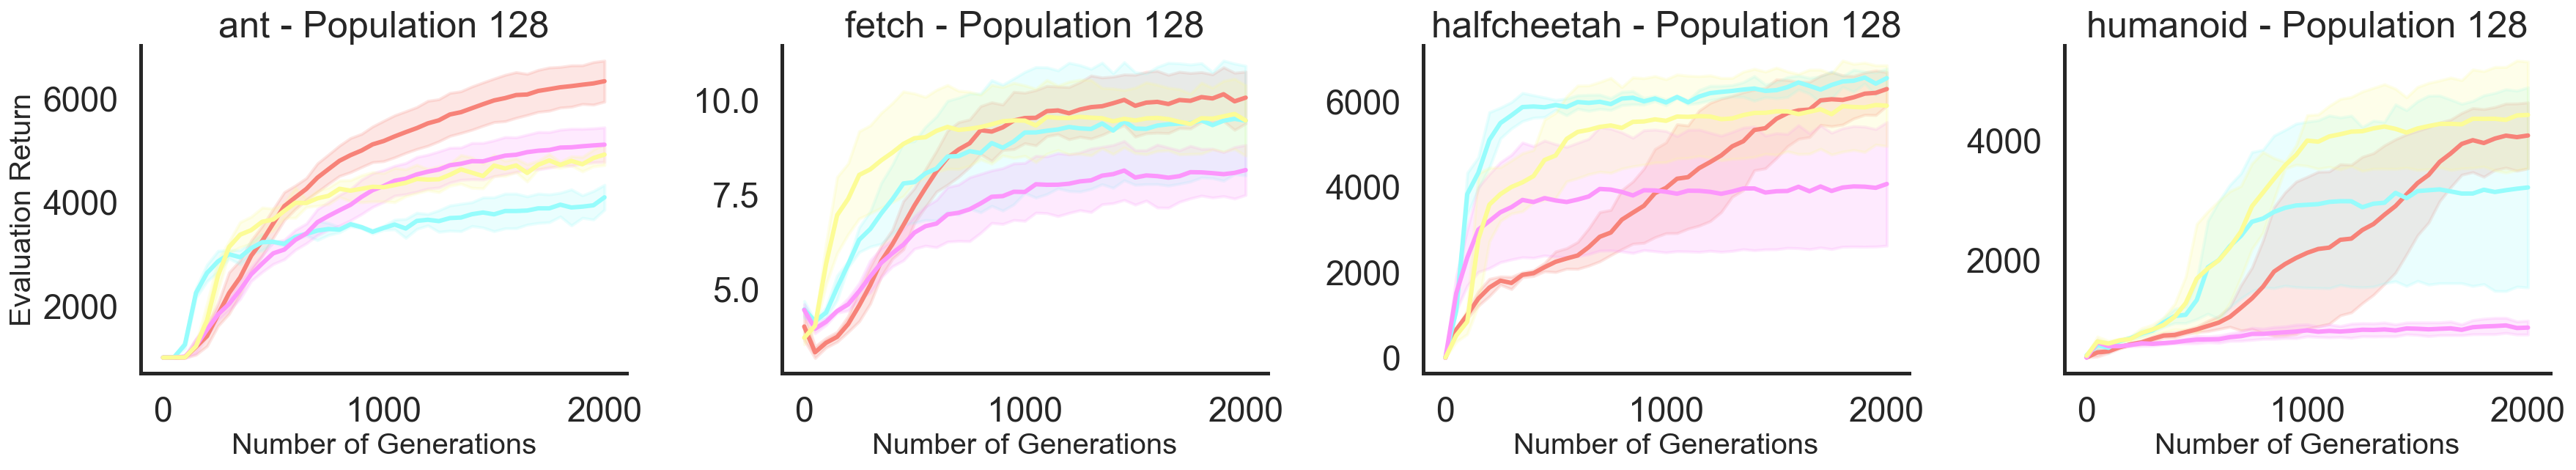

In [6]:
fig, axs = plt.subplots(1, 4, figsize=(25, 5))

for i, env in enumerate([ "ant", "fetch", "halfcheetah", "humanoid"]):
    mean, std, gens = get_perf_env(meta_log_open, hyper_log_open, 128, env)
    axs.flatten()[i].plot(gens, mean, label="OpenAI-ES", color=colors[0])
    axs.flatten()[i].fill_between(gens, mean - std, mean + std, color=colors[0], alpha=0.2)

    mean, std, gens = get_perf_env(meta_log_snes, hyper_log_snes, 128, env)
    axs.flatten()[i].plot(gens, mean, label="SNES", color=colors[1])
    axs.flatten()[i].fill_between(gens, mean - std, mean + std, color=colors[1], alpha=0.2)

    mean, std, gens = get_perf_env(meta_log_pgpe, hyper_log_pgpe, 128, env)
    axs.flatten()[i].plot(gens, mean, label="PGPE", color=colors[2])
    axs.flatten()[i].fill_between(gens, mean - std, mean + std, color=colors[2], alpha=0.2)

    mean, std, gens = get_perf_env(meta_log_sep, hyper_log_sep, 128, env)
    axs.flatten()[i].plot(gens, mean, label="Sep-CMA-ES", color=colors[3])
    axs.flatten()[i].fill_between(gens, mean - std, mean + std, color=colors[3], alpha=0.2)

    axs.flatten()[i].spines["top"].set_visible(False)
    axs.flatten()[i].spines["right"].set_visible(False)
    axs.flatten()[i].spines["top"].set_visible(False)
    axs.flatten()[i].spines["right"].set_visible(False)
    axs.flatten()[i].set_title(env + f" - Population {128}")

# axs.flatten()[1].legend(fontsize=14)
axs.flatten()[0].set_xlabel("Number of Generations", fontsize=20)
axs.flatten()[1].set_xlabel("Number of Generations", fontsize=20)
axs.flatten()[2].set_xlabel("Number of Generations", fontsize=20)
axs.flatten()[3].set_xlabel("Number of Generations", fontsize=20)
axs.flatten()[0].set_ylabel("Evaluation Return", fontsize=20)

fig.tight_layout()

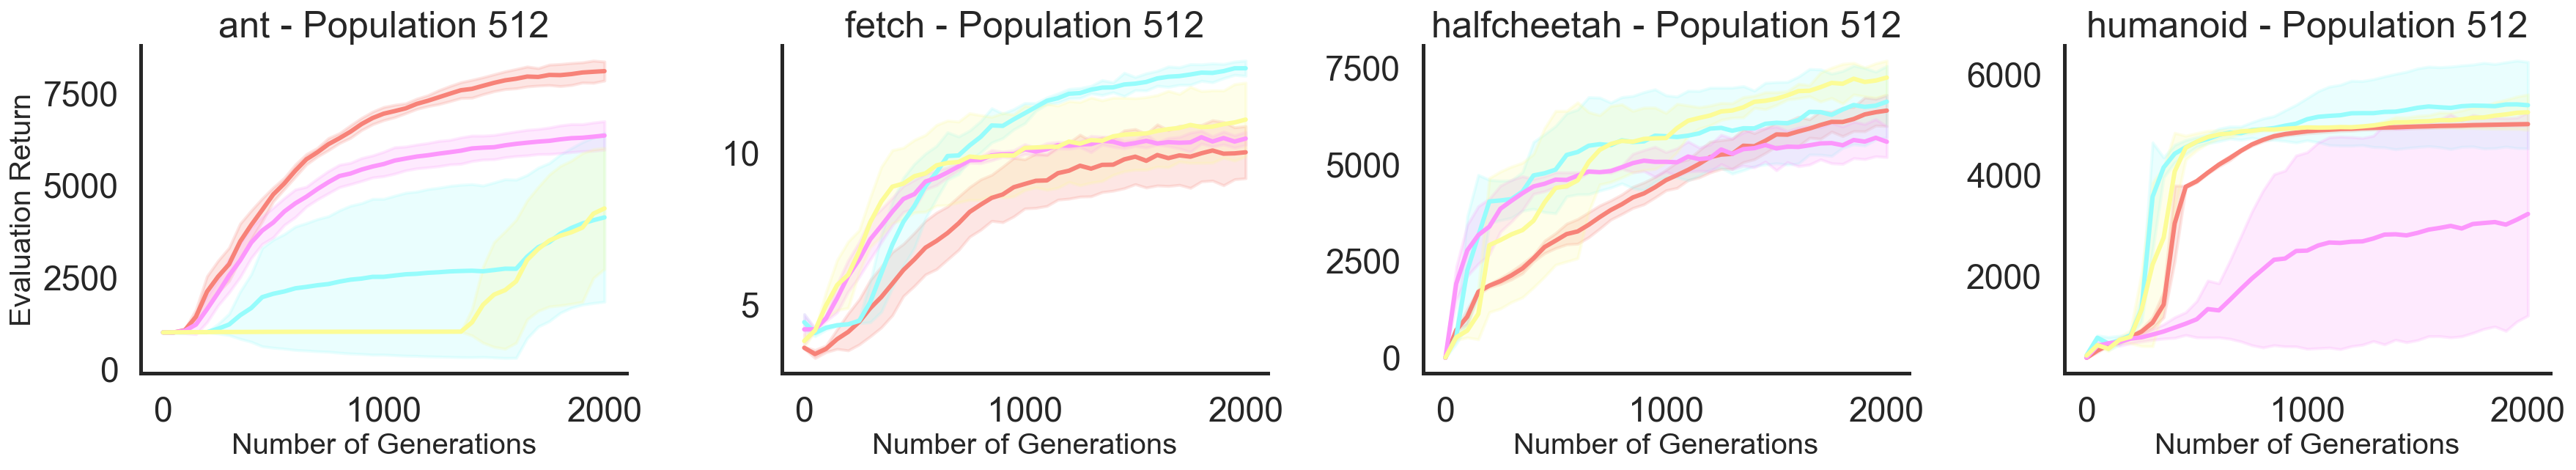

In [7]:
fig, axs = plt.subplots(1, 4, figsize=(25, 5))

for i, env in enumerate([ "ant", "fetch", "halfcheetah", "humanoid"]):
    mean, std, gens = get_perf_env(meta_log_open, hyper_log_open, 512, env)
    axs.flatten()[i].plot(gens, mean, label="OpenAI-ES", color=colors[0])
    axs.flatten()[i].fill_between(gens, mean - std, mean + std, color=colors[0], alpha=0.2)

    mean, std, gens = get_perf_env(meta_log_snes, hyper_log_snes, 512, env)
    axs.flatten()[i].plot(gens, mean, label="SNES", color=colors[1])
    axs.flatten()[i].fill_between(gens, mean - std, mean + std, color=colors[1], alpha=0.2)

    mean, std, gens = get_perf_env(meta_log_pgpe, hyper_log_pgpe, 512, env)
    axs.flatten()[i].plot(gens, mean, label="PGPE", color=colors[2])
    axs.flatten()[i].fill_between(gens, mean - std, mean + std, color=colors[2], alpha=0.2)

    mean, std, gens = get_perf_env(meta_log_sep, hyper_log_sep, 512, env)
    axs.flatten()[i].plot(gens, mean, label="Sep-CMA-ES", color=colors[3])
    axs.flatten()[i].fill_between(gens, mean - std, mean + std, color=colors[3], alpha=0.2)

    axs.flatten()[i].spines["top"].set_visible(False)
    axs.flatten()[i].spines["right"].set_visible(False)
    axs.flatten()[i].spines["top"].set_visible(False)
    axs.flatten()[i].spines["right"].set_visible(False)
    axs.flatten()[i].set_title(env + f" - Population {512}")

# axs.flatten()[1].legend(fontsize=14)
axs.flatten()[0].set_xlabel("Number of Generations", fontsize=20)
axs.flatten()[1].set_xlabel("Number of Generations", fontsize=20)
axs.flatten()[2].set_xlabel("Number of Generations", fontsize=20)
axs.flatten()[3].set_xlabel("Number of Generations", fontsize=20)
axs.flatten()[0].set_ylabel("Evaluation Return", fontsize=20)

fig.tight_layout()

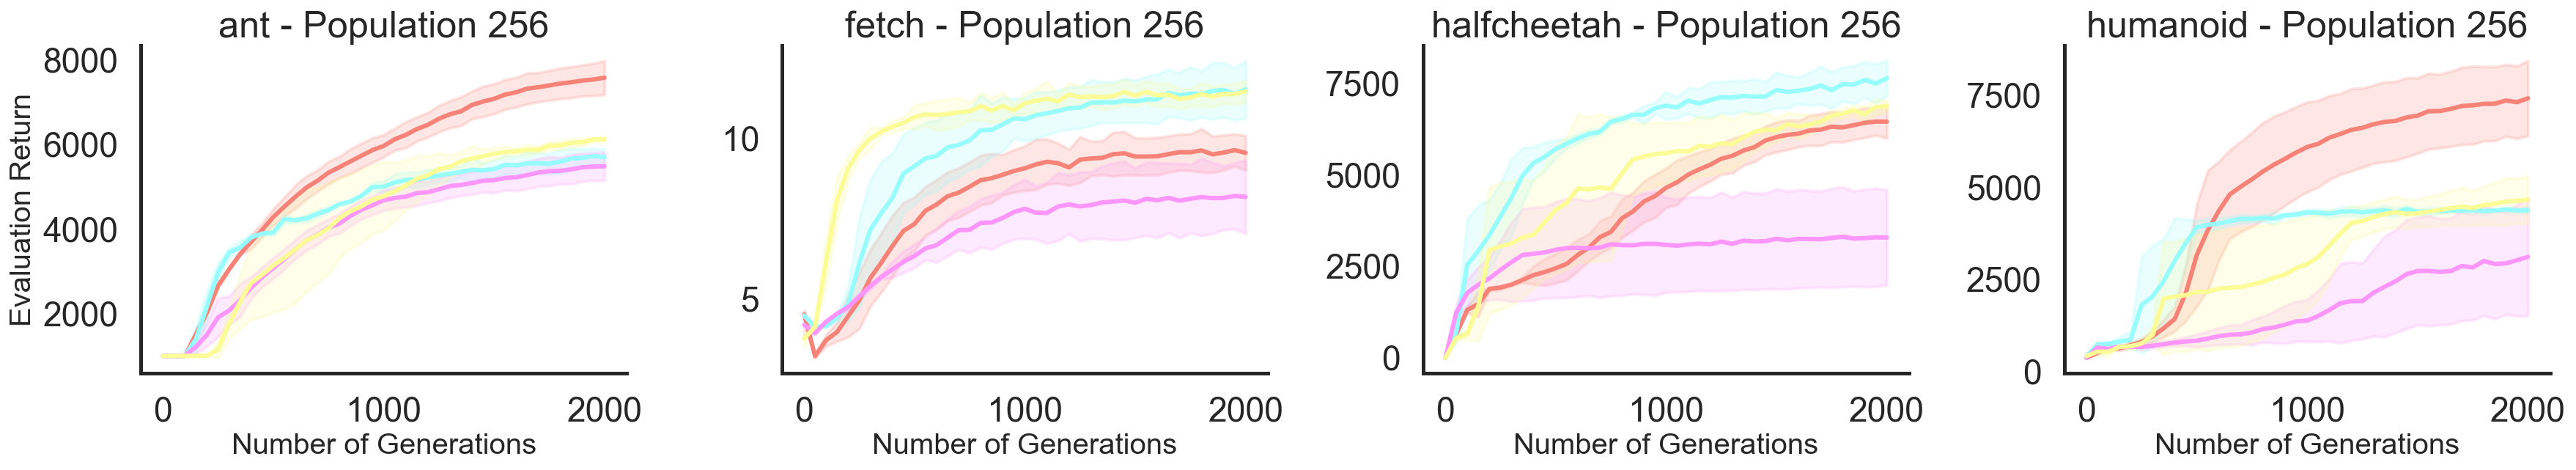

In [8]:
fig, axs = plt.subplots(1, 4, figsize=(25, 5))

for i, env in enumerate([ "ant", "fetch", "halfcheetah", "humanoid"]):
    mean, std, gens = get_perf_env(meta_log_open, hyper_log_open, 256, env)
    axs.flatten()[i].plot(gens, mean, label="OpenAI-ES", color=colors[0])
    axs.flatten()[i].fill_between(gens, mean - std, mean + std, color=colors[0], alpha=0.2)

    mean, std, gens = get_perf_env(meta_log_snes, hyper_log_snes, 256, env)
    axs.flatten()[i].plot(gens, mean, label="SNES", color=colors[1])
    axs.flatten()[i].fill_between(gens, mean - std, mean + std, color=colors[1], alpha=0.2)

    mean, std, gens = get_perf_env(meta_log_pgpe, hyper_log_pgpe, 256, env)
    axs.flatten()[i].plot(gens, mean, label="PGPE", color=colors[2])
    axs.flatten()[i].fill_between(gens, mean - std, mean + std, color=colors[2], alpha=0.2)

    mean, std, gens = get_perf_env(meta_log_sep, hyper_log_sep, 256, env)
    axs.flatten()[i].plot(gens, mean, label="Sep-CMA-ES", color=colors[3])
    axs.flatten()[i].fill_between(gens, mean - std, mean + std, color=colors[3], alpha=0.2)

    axs.flatten()[i].spines["top"].set_visible(False)
    axs.flatten()[i].spines["right"].set_visible(False)
    axs.flatten()[i].spines["top"].set_visible(False)
    axs.flatten()[i].spines["right"].set_visible(False)
    axs.flatten()[i].set_title(env + f" - Population {256}")

# axs.flatten()[1].legend(fontsize=14)
axs.flatten()[0].set_xlabel("Number of Generations", fontsize=20)
axs.flatten()[1].set_xlabel("Number of Generations", fontsize=20)
axs.flatten()[2].set_xlabel("Number of Generations", fontsize=20)
axs.flatten()[3].set_xlabel("Number of Generations", fontsize=20)
axs.flatten()[0].set_ylabel("Evaluation Return", fontsize=20)

fig.tight_layout()